Thesis: Does age and gender play a role in the lenght of time people with diabetes is hospitalized?

In [ ]:
# # import the following libraries to analyze the raw dataset listed below
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv')

In [ ]:
# # calling the upper 5 rows - df.head (this amount could be any amount desired)
df.head(20)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
# check the data for null values
df.isnull().sum().sum()

0

In [ ]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [ ]:
# checking to see if the index contains any unique values
df['encounter_id'].is_unique

True

In [ ]:
# I then went about setting a new index
df=df.set_index('encounter_id')

In [ ]:
# check the new index
df.head(5)

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,...,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
# use the .column function to basically make a decision on which columns I wanted to drop
df.columns

Index(['patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [ ]:
# as per the results above, I decided to subset the columns I needed to work with
subset=df[['gender', 'age', 'time_in_hospital']]

In [ ]:
subset.head(5)

,gender,age,time_in_hospital
encounter_id,,,
2278392,Female,[0-10),1
149190,Female,[10-20),3
64410,Female,[20-30),2
500364,Male,[30-40),2
16680,Male,[40-50),1


In [ ]:
# rename a column
df=df.rename(columns = {'time_in_hospital' : 'hospital_stay'})

In [ ]:
# using the .loc operator to index the portion of the dataframe I wanted 
df1 = df.loc[df['gender'] == 'Female']

In [ ]:
df1

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,hospital_stay,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,...,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443842136,181593374,Caucasian,Female,[70-80),?,1,1,7,5,?,...,No,Steady,No,No,No,No,No,No,Yes,NO
443842340,120975314,Caucasian,Female,[80-90),?,1,1,7,5,MC,...,No,Up,No,No,No,No,No,Ch,Yes,NO
443847176,50375628,AfricanAmerican,Female,[60-70),?,1,1,7,6,DM,...,No,Down,No,No,No,No,No,Ch,Yes,>30


In [ ]:

df1.groupby(['age'])['hospital_stay'].count()

age
[0-10)         83
[10-20)       402
[20-30)      1114
[30-40)      2162
[40-50)      4811
[50-60)      8572
[60-70)     11061
[70-80)     13985
[80-90)     10515
[90-100)     2003
Name: hospital_stay, dtype: int64

[Text(0.5, 1.0, 'Female')]

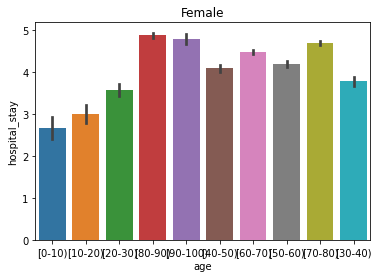

In [ ]:
# displaying the information as a graph
sns.barplot(x="age", y="hospital_stay", data=df1).set(title='Female')

In [ ]:
# using the .loc operator to index the portion of the dataframe I wanted 
df2 = df.loc[df['gender'] == 'Male']

In [ ]:
df2

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,hospital_stay,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,
500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,?,...,No,Steady,No,No,No,No,No,No,Yes,>30
55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,?,...,No,No,No,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443841992,184875899,Other,Male,[40-50),?,1,1,7,13,?,...,No,Down,No,No,No,No,No,Ch,Yes,NO
443842778,86472243,Caucasian,Male,[80-90),?,1,1,7,1,MC,...,No,Up,No,No,No,No,No,Ch,Yes,NO
443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,...,No,Down,No,No,No,No,No,Ch,Yes,>30


In [ ]:
df2.groupby(['age'])['hospital_stay'].count()

age
[0-10)         78
[10-20)       289
[20-30)       543
[30-40)      1613
[40-50)      4874
[50-60)      8684
[60-70)     11421
[70-80)     12081
[80-90)      6682
[90-100)      790
Name: hospital_stay, dtype: int64

[Text(0.5, 1.0, 'Male')]

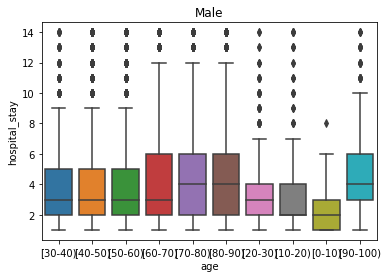

In [ ]:
sns.boxplot(x="age", y="hospital_stay", data=df2).set(title='Male')

In [ ]:
# comparing my data to ans the question 'does age and gender play a role in the lenght of time people with diabetes is hospitalized?'
Dataframes = [df1, df2]

In [ ]:
df3 = pd.concat(Dataframes)

In [ ]:
df3

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,hospital_stay,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,...,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443841992,184875899,Other,Male,[40-50),?,1,1,7,13,?,...,No,Down,No,No,No,No,No,Ch,Yes,NO
443842778,86472243,Caucasian,Male,[80-90),?,1,1,7,1,MC,...,No,Up,No,No,No,No,No,Ch,Yes,NO
443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,...,No,Down,No,No,No,No,No,Ch,Yes,>30


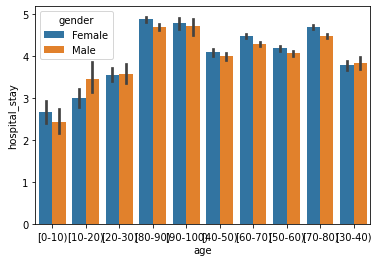

In [ ]:
sns.barplot(x="age", y="hospital_stay", hue="gender", data=df3)

In [ ]:
# my analysis shows that females between the ages of 0-10 years show a slight increase in the amount of time they are hospitalized when compared to males of the same age group
# the analysis also shows that males between the ages of 10-20 also have a slightly higher hospitalization stay. 
# the data showed a slight difference between males and females, with females showing a longer in-hospital recovery time in the 40-50 age group and older 